In [14]:
import librosa
import wave
import numpy as np
import matplotlib.pyplot as plt

def load_wav_file(filename):
    wav = wave.open(filename, "r")
    frames = wav.readframes(-1)
    sound_info = np.frombuffer(frames, "int16")
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

x, fr = load_wav_file('data/audio/cgxwaehnir.wav')

x2, fr2 = librosa.load('data/audio/dumxartuej.wav', sr=20000)

[ 0  0 -1 ...  7 -6 12]


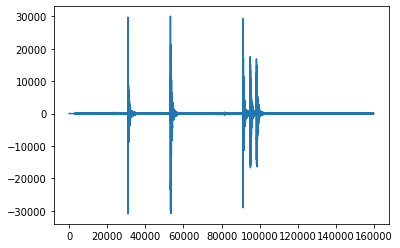

In [15]:
print(x)

plt.plot(x)

[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.9672852e-04
  1.3122559e-03  6.4086914e-04]
0.9826355


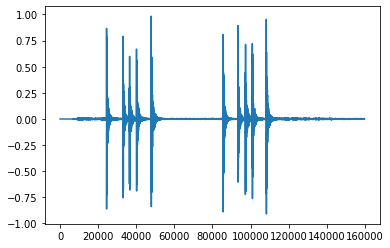

In [16]:
print(x2)
plt.plot(x2)

maxAbs2 = np.max(np.abs(x2))

print(maxAbs2)

30967
[ 0.00000000e+00  0.00000000e+00 -3.22924403e-05 ...  2.26047082e-04
 -1.93754642e-04  3.87509284e-04]


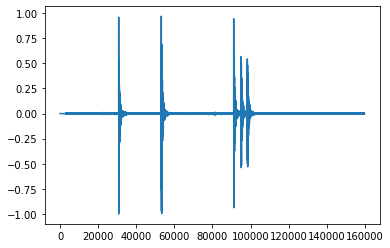

In [17]:
maxAbs = np.max(np.abs(x))
print(maxAbs)

x = x / maxAbs
print(x)

plt.plot(x)

In [ ]:
def get_features(self, x, plot = False):
    poly_features=librosa.feature.poly_features(y = x) #order 1 by default
    features = poly_features[1]

    # plot the features
    if(plot):
        plt.figure(figsize=(15, 5))
        plt.plot(features)
        plt.title('Features')
        plt.show()

    # if val inn norm is > 2, set to 1, else  0
    # Everything over 2000 hertz gets set to 1
    features_array = features > 2
    features_array = features_array.astype(int)

    # find changes from 0 to 1
    features_array = np.diff(features_array)
    # find indices where changes occur
    features_array = np.where(features_array == 1)[0]

    difference_array = np.diff(features_array)
    
    # Pad to length of 15
    difference_array = np.pad(difference_array, (0, 15 - len(difference_array)), 'constant')

    return difference_array